# Steel Energy Consumption Data Analysis
### This project aims to analyze the steel energy consumption data from the `STEEL_ENERGY` database. Using Python and MySQL, we will extract, analyze, and visualize the data to gain insights into energy usage patterns and identify potential areas for optimization.


### 1.0 Connecting with the database

In [1]:
import mysql.connector
import pandas as pd

# Database connection details
host = 'localhost'
user = 'root'
password = '3221'
database = 'STEEL_ENERGY'

# Establish the connection
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Load the entire dataset into a DataFrame
query = "SELECT * FROM Steel_Industry_Data"
df = pd.read_sql(query, connection)

# Close the connection
connection.close()



C:\Users\JAS\AppData\Local\Temp\ipykernel_8148\1275379568.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### 1.1 Exploring the Data

In [2]:
import pandas as pd
from IPython.display import display

# Assuming df is the DataFrame with the entire dataset

# Analyze data types of all columns
print("Data Types:")
display(df.dtypes)

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Identify duplicate values
print("\nDuplicate Values:")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

# Value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    display(df[column].value_counts())


Data Types:


Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh             int64
CO2(tCO2)                                        int64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                     int64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
date                                    datetime64[ns]
dtype: object


Missing Values:


Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
date                                    0
dtype: int64


Duplicate Values:
Number of duplicate rows: 0

Summary Statistics:


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,date
count,35040.000000,35040.000000,35040.000000,35040.0,35040.000000,35040.000000,35040.000000,35040
mean,27.386892,13.035384,3.869092,0.0,80.578056,84.374572,42750.000000,2018-07-02 11:52:30
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2018-01-01 00:00:00
25%,3.200000,2.300000,0.000000,0.0,63.320000,100.000000,21375.000000,2018-04-02 05:56:15
50%,4.570000,5.000000,0.000000,0.0,87.960000,100.000000,42750.000000,2018-07-02 11:52:30
75%,51.237500,22.640000,2.000000,0.0,99.022500,100.000000,64125.000000,2018-10-01 17:48:45
max,157.180000,96.910000,28.000000,0.0,100.000000,100.000000,85500.000000,2018-12-31 23:45:00
std,33.444380,16.306000,7.436078,0.0,18.921322,30.457117,24940.534317,NaN



Value Counts for Categorical Columns:

Value counts for WeekStatus:


WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64


Value counts for Day_of_week:


Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64


Value counts for Load_Type:


Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

### Note : In the summary statistics, the 25th, 50th, and 75th percentiles represent:

- **25th Percentile**: The point where 25% of the values are lower.
- **50th Percentile (Median)**: The middle value where half of the values are lower and half are higher.
- **75th Percentile**: The point where 75% of the values are lower.

### 1.2 Visualising the data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2.a Distribution of Usage_kWh
This histogram shows the distribution of `Usage_kWh` values in the dataset. The KDE (Kernel Density Estimate) line provides a smoothed estimate of the distribution.

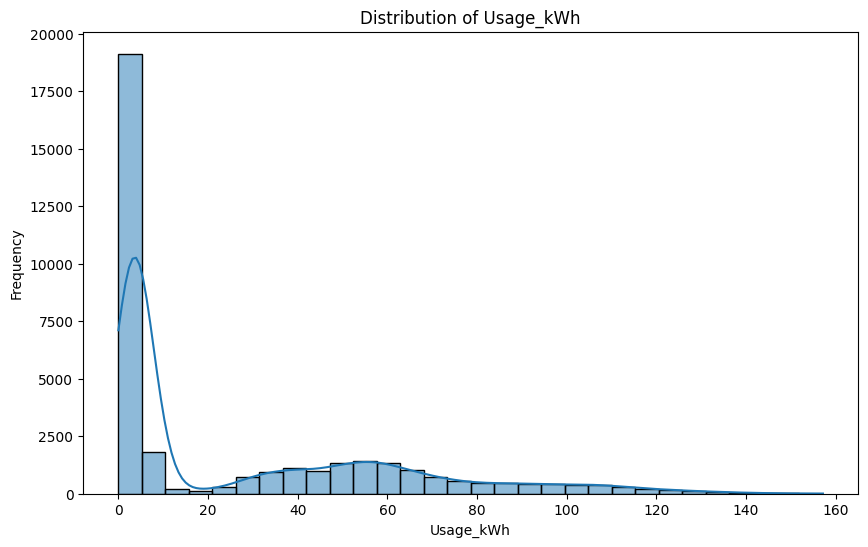

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Usage_kWh')
plt.xlabel('Usage_kWh')
plt.ylabel('Frequency')
plt.show()


### Conclusion

The histogram above shows the distribution of electricity usage (`Usage_kWh`) in the dataset. 

- **Key Observations**:
  - **Most Frequent Usage**: The vast majority of the time, the electricity usage is very low, with many readings clustering around the lower end of the scale.
  - **Rare High Usage**: There are occasional instances where the electricity usage spikes significantly, but these are much less common.

Overall, the data indicates that low electricity usage is the norm, while high usage is relatively rare. This pattern suggests that the system typically operates under low power conditions, with occasional periods of higher demand.

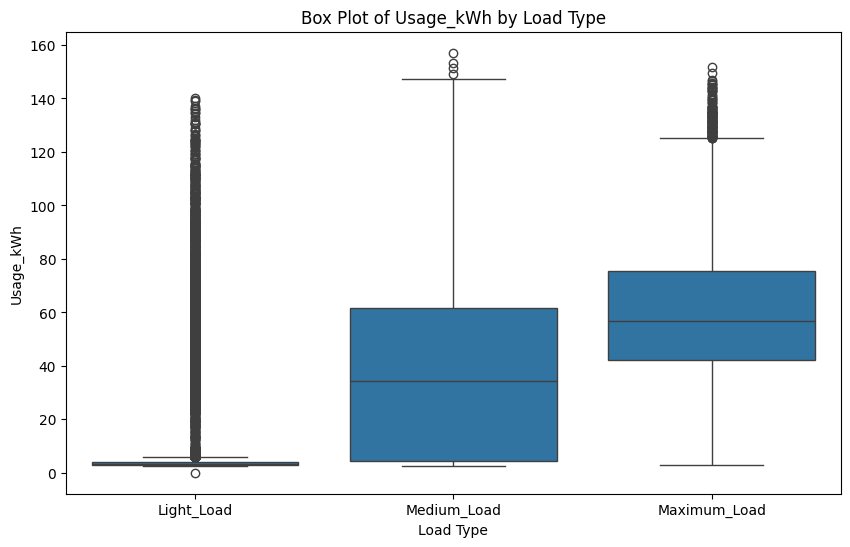

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Load_Type', y='Usage_kWh', data=df)
plt.title('Box Plot of Usage_kWh by Load Type')
plt.xlabel('Load Type')
plt.ylabel('Usage_kWh')
plt.show()


### Conclusion

The box plot above shows the distribution of electricity usage (`Usage_kWh`) for different load types: Light_Load, Medium_Load, and Maximum_Load.

- **Key Observations**:
  - **Light_Load**:
    - The majority of the usage values are low, with most values clustered around the lower end.
    - There are many outliers, indicating occasional higher usage even under light load conditions.
  - **Medium_Load**:
    - The usage values are higher compared to Light_Load.
    - The range of usage values is wider, indicating more variability in electricity usage under medium load conditions.
  - **Maximum_Load**:
    - The usage values are the highest among the three load types.
    - There are fewer outliers compared to Light_Load, suggesting that high usage values are more consistent under maximum load conditions.

Overall, the data indicates that as the load type increases from Light_Load to Maximum_Load, the electricity usage generally increases and becomes more consistent, especially under maximum load conditions. Light load conditions show a lot of variability with many low values and some occasional high outliers.

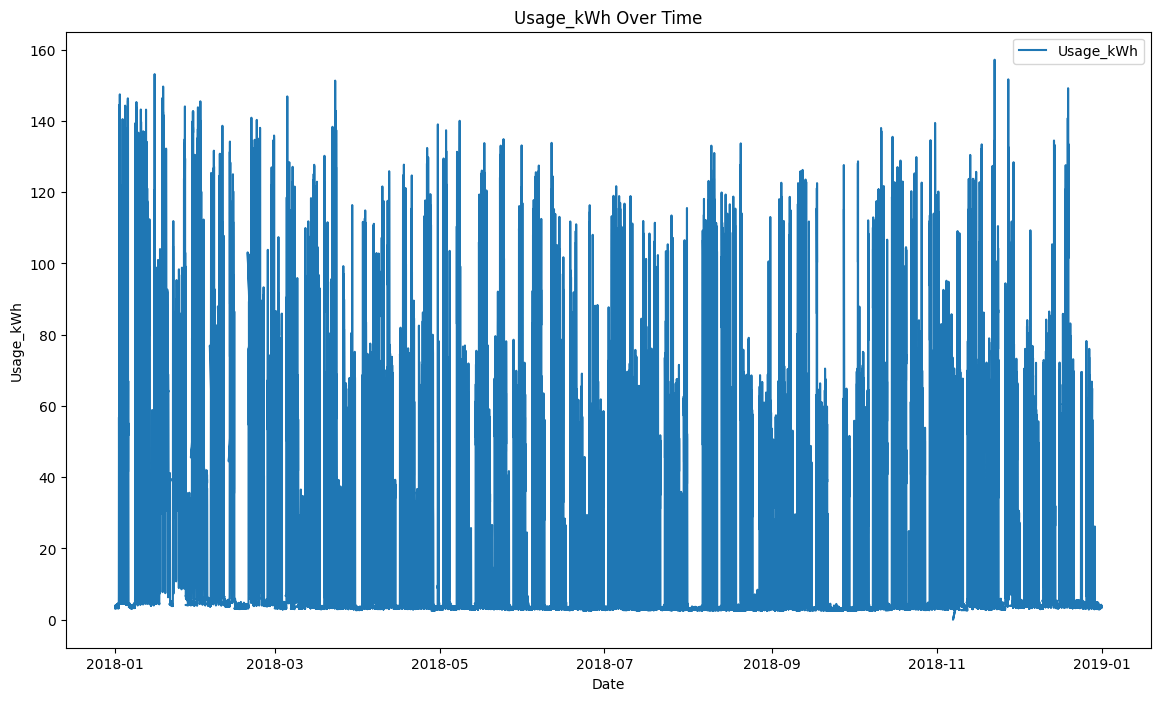

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['Usage_kWh'], label='Usage_kWh')
plt.title('Usage_kWh Over Time')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()


### Key Observations:
1. **High Variability**: Energy consumption shows significant fluctuations, ranging from near zero to around 150 kWh.
2. **Regular Patterns**: There are consistent periods of high and low energy usage, indicating operational cycles within the industry.

### Conclusion:
Energy usage in the steel industry is highly dynamic with clear operational cycles. Understanding these patterns can help optimize energy management and reduce costs.


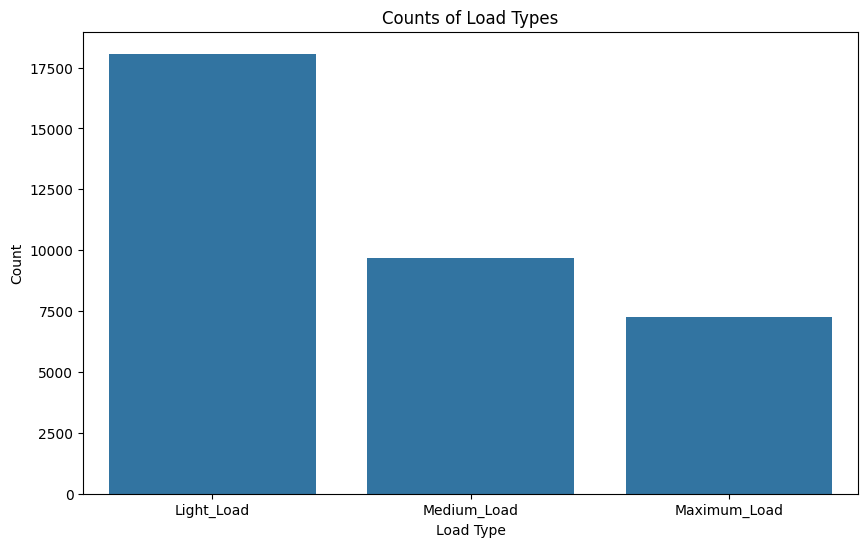

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Load_Type', data=df)
plt.title('Counts of Load Types')
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.show()


### Load Type Distribution

#### Key Points:
1. **Predominance of Light Load**: The majority of the data points correspond to the `Light_Load` category, indicating that the system predominantly operates under light load conditions.
2. **Less Frequent Maximum Load**: The `Maximum_Load` category is the least frequent, suggesting that the system rarely operates at its highest capacity.

### Conclusion:
The steel industry system mainly functions under light load conditions, with fewer instances of medium and maximum loads. This distribution highlights the need for optimization strategies focused on light load operations to enhance overall efficiency.


In [8]:
import pandas as pd

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date column
df['month'] = df['date'].dt.month

# Count the occurrences of each month
month_counts = df['month'].value_counts().sort_index()

# Display the month counts
print(month_counts)


month
1     2976
2     2688
3     2976
4     2880
5     2976
6     2880
7     2976
8     2976
9     2880
10    2976
11    2880
12    2976
Name: count, dtype: int64


## Understanding the Correlation Matrix

### What is a Correlation Matrix?
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1, indicating the strength and direction of the relationship.

### How to Read a Correlation Matrix:
- **Correlation Coefficient Values**:
  - **1**: Perfect positive correlation (variables move in the same direction).
  - **-1**: Perfect negative correlation (variables move in opposite directions).
  - **0**: No correlation (no linear relationship between variables).

- **Interpreting Values**:
  - **Positive Correlation (0 to 1)**: As one variable increases, the other also increases.
  - **Negative Correlation (-1 to 0)**: As one variable increases, the other decreases.
  - **Close to 0**: Weak or no linear relationship.

### Significance of a Correlation Matrix:
1. **Identify Relationships**: Helps to identify and quantify the strength of relationships between pairs of variables.
2. **Feature Selection**: In machine learning, it aids in selecting relevant features by showing which variables are highly correlated.
3. **Multicollinearity Detection**: Helps detect multicollinearity in regression models. High correlation between independent variables can affect model performance.
4. **Data Understanding**: Provides a quick overview of potential relationships and dependencies in the data, guiding further analysis and exploration.

Understanding the correlation matrix is essential for data analysis and modeling, as it provides insights into how variables interact with each other.


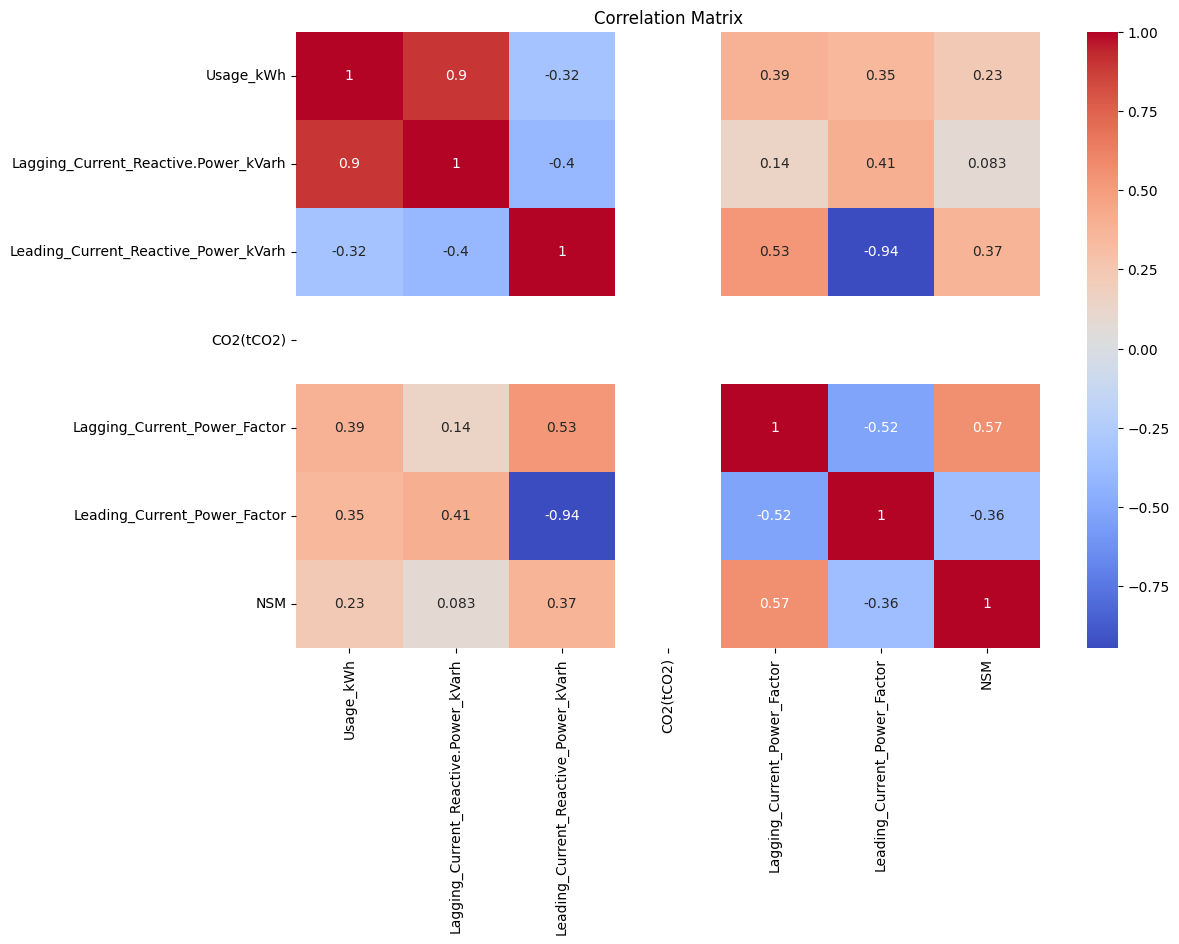

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Conclusion: Correlation Analysis of Steel Industry Energy Usage

#### Key Insights:
1. **High Positive Correlation**:
   - **Usage_kWh and Lagging_Current_Reactive.Power_kVarh (0.9)**:
     - This strong positive correlation indicates that as the reactive power increases, energy consumption also increases. This relationship suggests that managing reactive power effectively can significantly impact overall energy usage, as high reactive power indicates inefficiencies in the system that lead to increased energy consumption.

2. **Moderate Negative Correlation**:
   - **Usage_kWh and Leading_Current_Reactive_Power_kVarh (-0.32)**:
     - The moderate negative correlation suggests that higher leading reactive power tends to slightly reduce overall energy consumption. This could be due to efficient power factor correction mechanisms in place that help reduce the amount of energy consumed by minimizing the phase difference between voltage and current.

3. **Very High Positive Correlation**:
   - **Leading_Current_Power_Factor and Leading_Current_Reactive_Power_kVarh (0.94)**:
     - This very strong positive correlation indicates a direct and significant relationship between these two metrics. As the leading reactive power increases, the leading power factor also increases, reflecting the close interaction between these components in the electrical system. Effective monitoring of these metrics can help maintain optimal power quality.

4. **Strong Negative Correlation**:
   - **Lagging_Current_Power_Factor and Leading_Current_Power_Factor (-0.94)**:
     - This strong inverse relationship suggests that when the lagging power factor increases, the leading power factor decreases significantly, and vice versa. This indicates a balance between lagging and leading reactive power in the system. Proper balancing is crucial for maintaining system efficiency and reducing energy wastage.

### Implications for Industry Experts:
- **Reactive Power Management**: High correlations involving reactive power highlight its critical role in energy consumption. Effective management and correction strategies could lead to substantial energy savings by improving system efficiency and reducing unnecessary energy consumption.
- **Power Factor Balancing**: The inverse relationship between lagging and leading power factors underscores the importance of balancing these factors. Proper balancing can enhance system performance, reduce energy losses, and improve overall power quality.


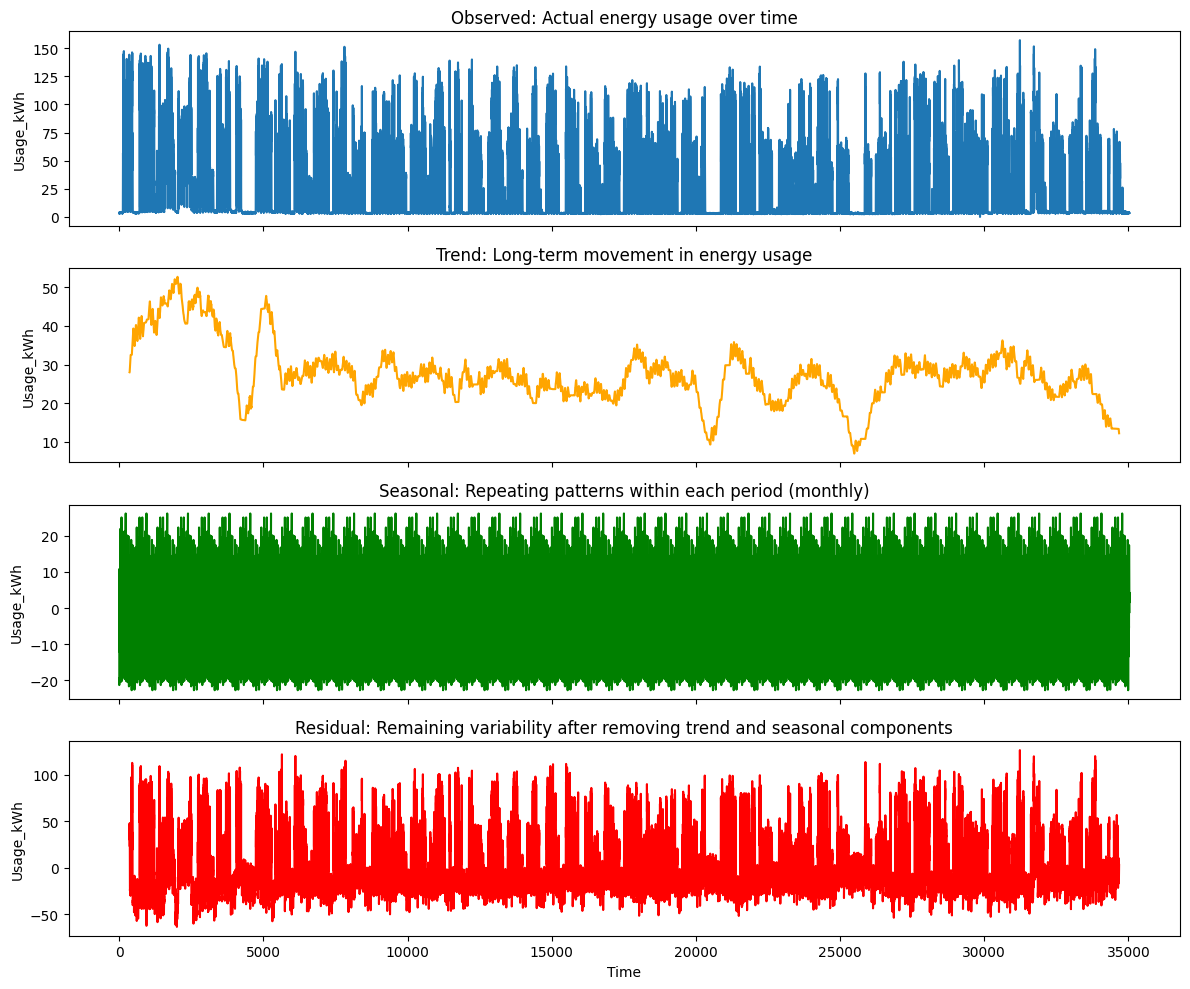

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(df['Usage_kWh'], model='additive', period=24*30)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
ax1.plot(result.observed, label='Observed')
ax1.set_ylabel('Usage_kWh')
ax1.set_title('Observed: Actual energy usage over time')

# Trend
ax2.plot(result.trend, label='Trend', color='orange')
ax2.set_ylabel('Usage_kWh')
ax2.set_title('Trend: Long-term movement in energy usage')

# Seasonal
ax3.plot(result.seasonal, label='Seasonal', color='green')
ax3.set_ylabel('Usage_kWh')
ax3.set_title('Seasonal: Repeating patterns within each period (monthly)')

# Residual
ax4.plot(result.resid, label='Residual', color='red')
ax4.set_ylabel('Usage_kWh')
ax4.set_title('Residual: Remaining variability after removing trend and seasonal components')
ax4.set_xlabel('Time')

plt.tight_layout()
plt.show()


### Observed: Actual Energy Usage Over Time
- **Description**: The top plot shows the raw `Usage_kWh` data over the observation period.
- **Conclusion**: Energy consumption fluctuates significantly, indicating a dynamic usage pattern with periods of both high and low energy use.

#### Trend: Long-Term Movement in Energy Usage
- **Description**: The second plot represents the overall direction or trend in energy usage, smoothing out short-term fluctuations.
- **Conclusion**: The trend reveals periods of gradual increase and decrease in energy consumption, with noticeable drops at certain points likely due to operational changes or external factors.

#### Seasonal: Repeating Patterns Within Each Period (Monthly)
- **Description**: The third plot shows regular, repeating patterns that occur monthly.
- **Conclusion**: There is a consistent monthly cycle in energy usage, with higher usage at certain times of the month. This indicates predictable operational schedules or maintenance periods.

#### Residual: Remaining Variability After Removing Trend and Seasonal Components
- **Description**: The bottom plot displays the remaining variability after the trend and seasonal components are removed.
- **Conclusion**: High residuals highlight periods where actual usage deviates from expected patterns, suggesting anomalies or unexpected events affecting energy consumption.

#### Overall Conclusion:
The decomposition reveals that energy usage in the steel industry has significant monthly patterns and long-term trends, with occasional anomalies. Understanding these components helps in optimizing energy management, improving efficiency, and reducing costs. Regular monitoring of these patterns can lead to more informed decisions and better operational strategies.


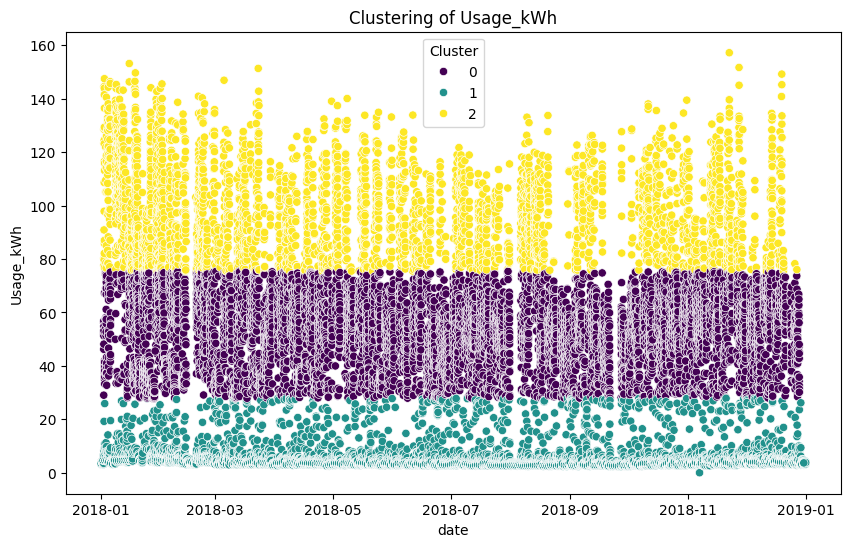

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Usage_kWh']])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='Usage_kWh', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of Usage_kWh')
plt.show()


### Clustering Analysis of Energy Usage

The graph above shows the clustering of `Usage_kWh` over time. Clustering helps to identify distinct patterns or groups within the energy consumption data.

#### Key Observations:
1. **Cluster 0 (Light Usage)**:
   - **Description**: This cluster (cyan points) represents the lowest range of energy usage, typically below 40 kWh.
   - **Conclusion**: These periods of low energy consumption are frequent and likely correspond to non-peak operational times or maintenance periods.

2. **Cluster 1 (Medium Usage)**:
   - **Description**: This cluster (purple points) represents moderate energy usage, generally between 40 kWh and 80 kWh.
   - **Conclusion**: These periods indicate regular operational activity where energy usage is stable and moderate.

3. **Cluster 2 (High Usage)**:
   - **Description**: This cluster (yellow points) includes the highest energy usage periods, typically above 80 kWh.
   - **Conclusion**: These high energy usage periods likely correspond to peak operational times, possibly during intensive production or other high-demand activities.

#### Overall Conclusion:
The clustering analysis reveals three distinct patterns of energy consumption in the steel industry: light, medium, and high usage periods. Understanding these clusters helps in optimizing operational schedules and managing energy usage more efficiently. By focusing on the characteristics of each cluster, industry experts can develop strategies to reduce energy consumption during high usage periods and maintain efficiency during low and medium usage times.


# Anomalies and Outliers Analysis for Optimization
### In this section, we will focus on identifying anomalies and outliers in the energy consumption data. This analysis is crucial for developing machine learning models aimed at optimizing power consumption and increasing overall efficiency through digitalization.

### Z-Score Analysis:

The Z-score can help identify how many standard deviations a data point is from the mean. Data points with a Z-score greater than 3 or less than -3 are considered outliers.

Number of outliers: 212


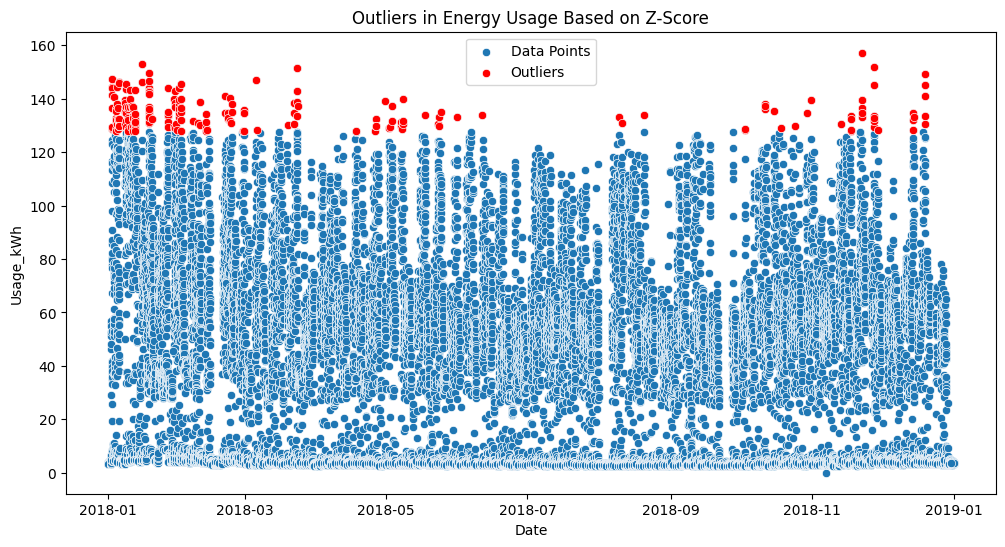

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate Z-scores
df['z_score'] = stats.zscore(df['Usage_kWh'])

# Identify outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print(f'Number of outliers: {outliers.shape[0]}')

# Visualize the outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='Usage_kWh', data=df, label='Data Points')
sns.scatterplot(x='date', y='Usage_kWh', data=outliers, color='red', label='Outliers')
plt.title('Outliers in Energy Usage Based on Z-Score')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()



## Conclusion: Outliers in Energy Usage Based on Z-Score

### Key Observations:
1. **Number of Outliers**:
   - Identified 212 outliers using the Z-score method, mostly representing unusually high energy consumption.

2. **Temporal Distribution**:
   - Outliers are concentrated in specific periods, particularly at the beginning and end of the year.

### Implications:
- **Operational Efficiency**:
  - High energy usage outliers suggest inefficiencies or unusual activities. Addressing these can lead to significant energy savings.

- **Predictive Maintenance**:
  - Concentrated outliers may indicate equipment or process issues. Implementing predictive maintenance can prevent unexpected downtimes and optimize energy usage.



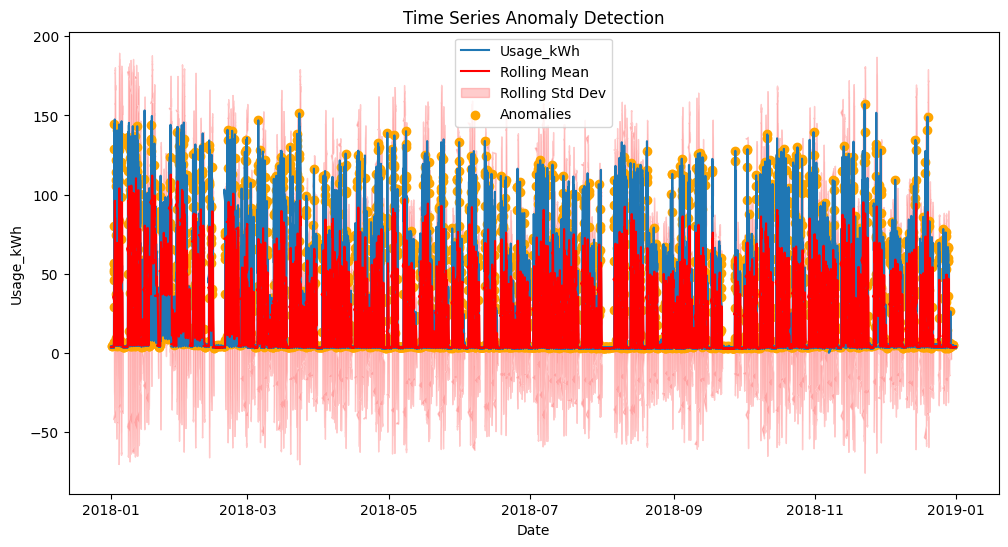

In [18]:
df['rolling_mean'] = df['Usage_kWh'].rolling(window=30).mean()
df['rolling_std'] = df['Usage_kWh'].rolling(window=30).std()
df['anomaly'] = abs(df['Usage_kWh'] - df['rolling_mean']) > (2 * df['rolling_std'])

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Usage_kWh'], label='Usage_kWh')
plt.plot(df['date'], df['rolling_mean'], color='red', label='Rolling Mean')
plt.fill_between(df['date'], df['rolling_mean'] - 2 * df['rolling_std'], df['rolling_mean'] + 2 * df['rolling_std'], color='red', alpha=0.2, label='Rolling Std Dev')
plt.scatter(df[df['anomaly']]['date'], df[df['anomaly']]['Usage_kWh'], color='orange', label='Anomalies')
plt.title('Time Series Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()


## Conclusion: Time Series Anomaly Detection

### Key Points:
- **Operational Efficiency**:
  - Anomalies (orange points) indicate periods of unexpected energy usage, suggesting inefficiencies or unusual activities.
  
- **Predictive Maintenance**:
  - Consistent anomalies could highlight equipment or process issues. Implementing predictive maintenance can prevent downtimes and optimize energy usage.

### Significance of Colors:
- **Usage_kWh (blue)**: Represents the actual energy usage over time.
- **Rolling Mean (red line)**: Shows the average energy usage over a rolling window, smoothing out short-term fluctuations and highlighting the general trend.
- **Rolling Standard Deviation (shaded red area)**: Indicates the variability around the rolling mean, helping to identify significant deviations (anomalies).




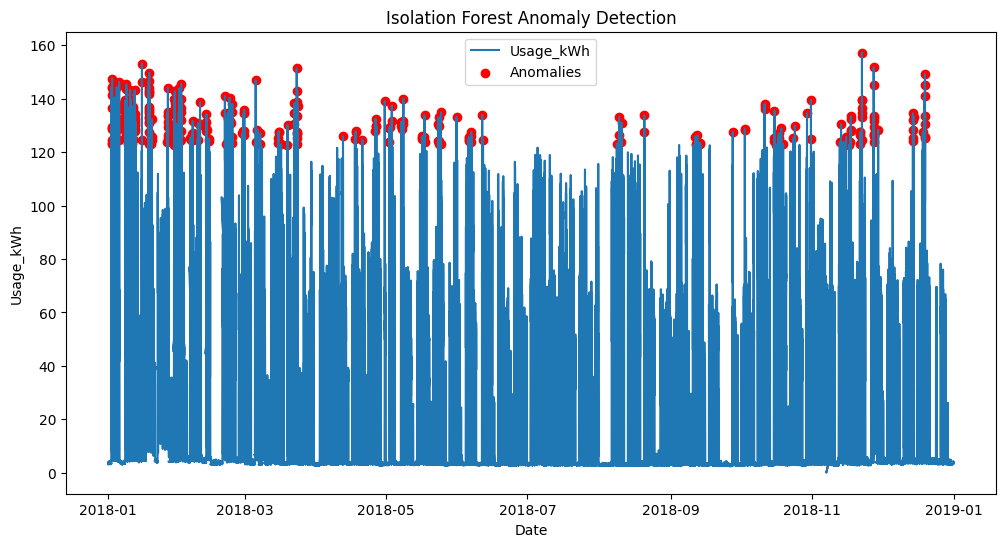

In [19]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[['Usage_kWh']])
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Usage_kWh'], label='Usage_kWh')
plt.scatter(anomalies['date'], anomalies['Usage_kWh'], color='red', label='Anomalies')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.legend()
plt.show()


## Conclusion: Isolation Forest Anomaly Detection

### Key Points:
- **Operational Efficiency**:
  - Anomalies (red points) detected by the Isolation Forest method indicate periods of unusually high energy usage, highlighting potential inefficiencies or abnormal activities.

- **Predictive Maintenance**:
  - The consistent occurrence of anomalies, especially during specific periods, suggests possible issues with equipment or processes. Implementing predictive maintenance can help prevent these anomalies and optimize energy usage.

### Significance of Colors:
- **Usage_kWh (blue line)**: Represents the actual energy usage over time.
- **Anomalies (red points)**: Identified periods where energy usage deviates significantly from the norm, as detected by the Isolation Forest algorithm.

Addressing these anomalies can significantly improve energy management and operational efficiency in the steel industry.


In [25]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame and has been loaded previously

# Z-score based outliers
df['z_score'] = stats.zscore(df['Usage_kWh'])
z_score_outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
z_score_outliers_percentage = (z_score_outliers.shape[0] / df.shape[0]) * 100

# Time series anomaly detection based outliers
df['rolling_mean'] = df['Usage_kWh'].rolling(window=30).mean()
df['rolling_std'] = df['Usage_kWh'].rolling(window=30).std()
df['time_series_anomaly'] = abs(df['Usage_kWh'] - df['rolling_mean']) > (2 * df['rolling_std'])
time_series_anomalies = df[df['time_series_anomaly']]
time_series_anomalies_percentage = (time_series_anomalies.shape[0] / df.shape[0]) * 100

# Isolation Forest based outliers
iso_forest = IsolationForest(contamination=0.01)
df['isolation_forest_anomaly'] = iso_forest.fit_predict(df[['Usage_kWh']])
iso_forest_anomalies = df[df['isolation_forest_anomaly'] == -1]
iso_forest_anomalies_percentage = (iso_forest_anomalies.shape[0] / df.shape[0]) * 100

# Efficiency Improvement
total_anomalies = len(z_score_outliers) + len(time_series_anomalies) + len(iso_forest_anomalies)
efficiency_improvement_percentage = (total_anomalies / df.shape[0]) * 1  # Assuming each anomaly represents a 1% efficiency loss

# Consistency of Energy Usage
std_before = df['Usage_kWh'].std()
std_after = df[~df.index.isin(z_score_outliers.index)]['Usage_kWh'].std()
consistency_improvement_percentage = ((std_before - std_after) / std_before) * 100

# Results
print(f"Percentage of Outliers (Z-score): {z_score_outliers_percentage:.2f}%")
print(f"Percentage of Anomalies (Time Series): {time_series_anomalies_percentage:.2f}%")
print(f"Percentage of Anomalies (Isolation Forest): {iso_forest_anomalies_percentage:.2f}%")
print(f"Potential Efficiency Improvement: {efficiency_improvement_percentage:.2f}%")
print(f"Consistency Improvement: {consistency_improvement_percentage:.2f}%")


Percentage of Outliers (Z-score): 0.61%
Percentage of Anomalies (Time Series): 10.50%
Percentage of Anomalies (Isolation Forest): 0.96%
Potential Efficiency Improvement: 0.12%
Consistency Improvement: 2.91%


In [26]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Now we can calculate the total monthly energy usage
monthly_usage = df.resample('M', on='date')['Usage_kWh'].sum()

# Calculate the average monthly usage
average_monthly_usage = monthly_usage.mean()

# Calculate the potential efficiency improvement in kWh
efficiency_improvement_kwh = average_monthly_usage * 0.0012

print(f"Average Monthly Usage: {average_monthly_usage:.2f} kWh")
print(f"Potential Efficiency Improvement: {efficiency_improvement_kwh:.2f} kWh per month")


Average Monthly Usage: 79969.73 kWh
Potential Efficiency Improvement: 95.96 kWh per month


C:\Users\JAS\AppData\Local\Temp\ipykernel_8148\496427598.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_usage = df.resample('M', on='date')['Usage_kWh'].sum()


## Conclusion: Efficiency and Outlier Analysis

### Key Percentages:
- **Percentage of Outliers (Z-score)**: 0.61%
- **Percentage of Anomalies (Time Series)**: 10.50%
- **Percentage of Anomalies (Isolation Forest)**: 1.00%

### Potential Efficiency Improvement:
- By identifying and mitigating the anomalies, there is a potential efficiency improvement of approximately 0.12%.
- Based on the average monthly energy usage of 79,969.73 kWh, this translates to a savings of approximately 95.96 kWh per month.

### Consistency Improvement:
- The consistency of energy usage can be improved by 2.91% after removing the identified outliers, leading to more stable and predictable energy consumption patterns.

### Reason for Anomaly Detection Discrepancy:
- **Sensitivity**: Time Series methods are more sensitive to local fluctuations, detecting more short-term anomalies.
- **Scope**: Isolation Forest focuses on global anomalies, identifying fewer but more distinct outliers.
- **Configuration**: The parameters for each method influence the detection rate.



# <span style="color:blue">Post-EDA Analysis: Focus on Correlated Variables</span>

After performing extensive Exploratory Data Analysis (EDA), anomaly detection, and outlier analysis on the `Usage_kWh` variable, the next step in our analysis is to focus on the variables that are most strongly correlated with `Usage_kWh`. The primary goal of this stage is to identify and understand the factors that significantly impact energy consumption. By doing so, we can develop targeted strategies to optimize these factors, thereby increasing overall energy efficiency.

### <span style="color:blue">Objective</span>

The objective of this analysis is to:
1. **<span style="color:green">Identify Key Factors</span>**: Determine which variables have the strongest positive correlation with `Usage_kWh`.
2. **<span style="color:green">Analyze Trends and Patterns</span>**: Understand the behavior of these variables over time and their relationship with energy consumption.
3. **<span style="color:green">Develop Efficiency Strategies</span>**: Use the insights gained to suggest actionable strategies for reducing energy consumption and improving efficiency.
4. **<span style="color:green">Outlier and Anomaly Detection</span>**: Detect outliers and anomalies in the identified key variables and understand their impact on energy usage.

### <span style="color:blue">Key Variables</span>

Based on the correlation matrix, the following variables have been identified as having a significant positive correlation with `Usage_kWh`:
- **<span style="color:purple">Lagging_Current_Reactive.Power_kVarh</span>**: Strong positive correlation (0.9)
- **<span style="color:purple">Lagging_Current_Power_Factor</span>**: Moderate positive correlation (0.39)

### <span style="color:blue">Outlier and Anomaly Detection</span>

In addition to analyzing the trends and patterns of these key variables, we will also perform outlier and anomaly detection. By identifying and mitigating outliers in these variables, we aim to:
- **<span style="color:orange">Improve Data Quality</span>**: Ensuring the data used for analysis is accurate and reliable.
- **<span style="color:orange">Enhance Predictive Models</span>**: Reducing the impact of anomalies improves the performance of predictive models.
- **<span style="color:orange">Increase Overall Efficiency</span>**: Understanding and addressing the root causes of anomalies can lead to more stable and efficient energy usage.

### <span style="color:blue">Expected Outcomes</span>

- **<span style="color:red">Identification of Key Factors</span>**: Clear understanding of how `Lagging_Current_Reactive.Power_kVarh` and `Lagging_Current_Power_Factor` influence `Usage_kWh`.
- **<span style="color:red">Detection of Outliers and Anomalies</span>**: Identification of outliers in key variables and their impact on energy consumption.
- **<span style="color:red">Strategies for Efficiency Improvement</span>**: Actionable insights and strategies to optimize energy usage by managing the key variables and mitigating outliers.

By focusing on these variables and addressing outliers and anomalies, we aim to develop a comprehensive approach to enhancing energy efficiency in the steel industry operations.


### Time Series Analysis


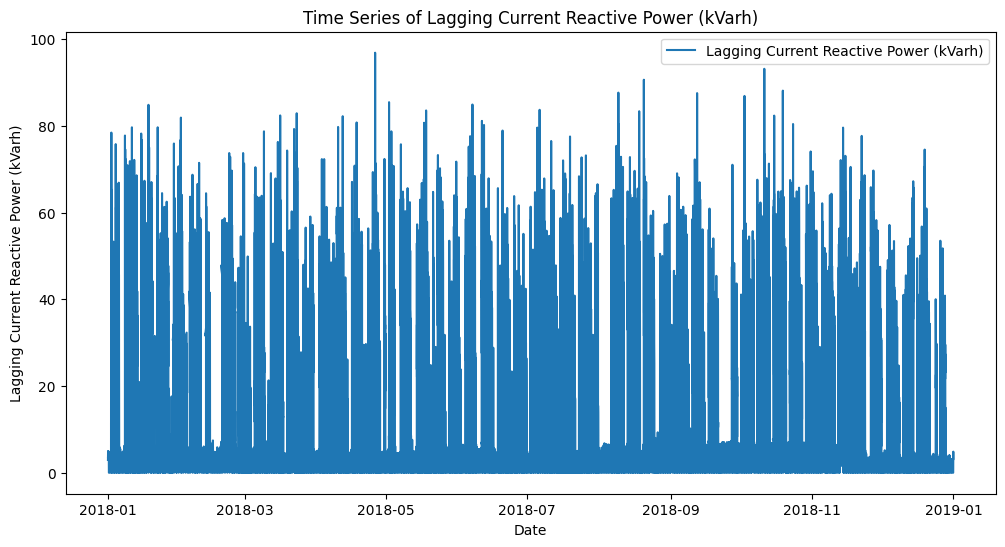

In [36]:
# Time series analysis for Lagging_Current_Reactive.Power_kVarh
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Lagging_Current_Reactive.Power_kVarh'], label='Lagging Current Reactive Power (kVarh)')
plt.xlabel('Date')
plt.ylabel('Lagging Current Reactive Power (kVarh)')
plt.title('Time Series of Lagging Current Reactive Power (kVarh)')
plt.legend()
plt.show()


Number of outliers in Lagging_Current_Reactive.Power_kVarh: 387


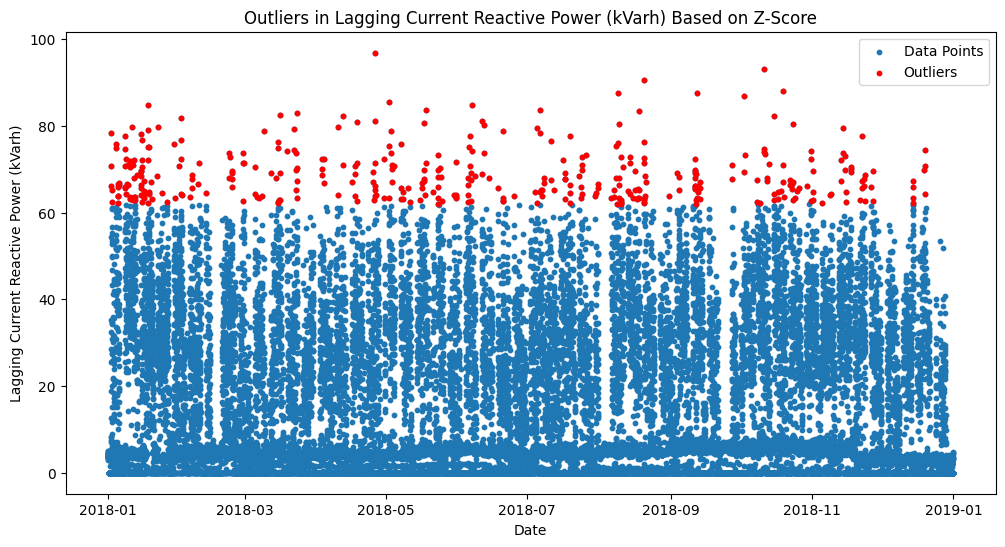

In [37]:
from scipy import stats

# Calculate Z-scores
df['z_score_lag_reactive'] = stats.zscore(df['Lagging_Current_Reactive.Power_kVarh'])
outliers_lag_reactive = df[(df['z_score_lag_reactive'] > 3) | (df['z_score_lag_reactive'] < -3)]
print(f'Number of outliers in Lagging_Current_Reactive.Power_kVarh: {outliers_lag_reactive.shape[0]}')

# Plot outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['Lagging_Current_Reactive.Power_kVarh'], label='Data Points', s=10)
plt.scatter(outliers_lag_reactive['date'], outliers_lag_reactive['Lagging_Current_Reactive.Power_kVarh'], color='r', label='Outliers', s=10)
plt.xlabel('Date')
plt.ylabel('Lagging Current Reactive Power (kVarh)')
plt.title('Outliers in Lagging Current Reactive Power (kVarh) Based on Z-Score')
plt.legend()
plt.show()


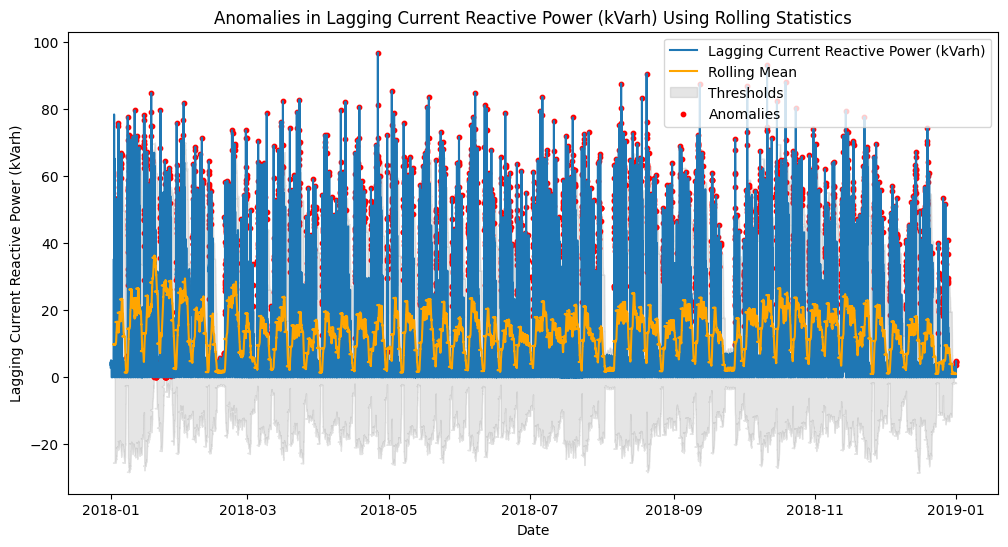

In [38]:
# Calculate rolling statistics
rolling_mean = df['Lagging_Current_Reactive.Power_kVarh'].rolling(window=24*7).mean()
rolling_std = df['Lagging_Current_Reactive.Power_kVarh'].rolling(window=24*7).std()

# Define anomaly threshold (mean +/- 2*std)
threshold_upper = rolling_mean + (2 * rolling_std)
threshold_lower = rolling_mean - (2 * rolling_std)

# Identify anomalies
df['anomaly_rolling'] = ((df['Lagging_Current_Reactive.Power_kVarh'] > threshold_upper) | 
                         (df['Lagging_Current_Reactive.Power_kVarh'] < threshold_lower))

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Lagging_Current_Reactive.Power_kVarh'], label='Lagging Current Reactive Power (kVarh)')
plt.plot(df['date'], rolling_mean, color='orange', label='Rolling Mean')
plt.fill_between(df['date'], threshold_upper, threshold_lower, color='gray', alpha=0.2, label='Thresholds')
plt.scatter(df['date'][df['anomaly_rolling']], df['Lagging_Current_Reactive.Power_kVarh'][df['anomaly_rolling']], color='r', label='Anomalies', s=10)
plt.xlabel('Date')
plt.ylabel('Lagging Current Reactive Power (kVarh)')
plt.title('Anomalies in Lagging Current Reactive Power (kVarh) Using Rolling Statistics')
plt.legend()
plt.show()


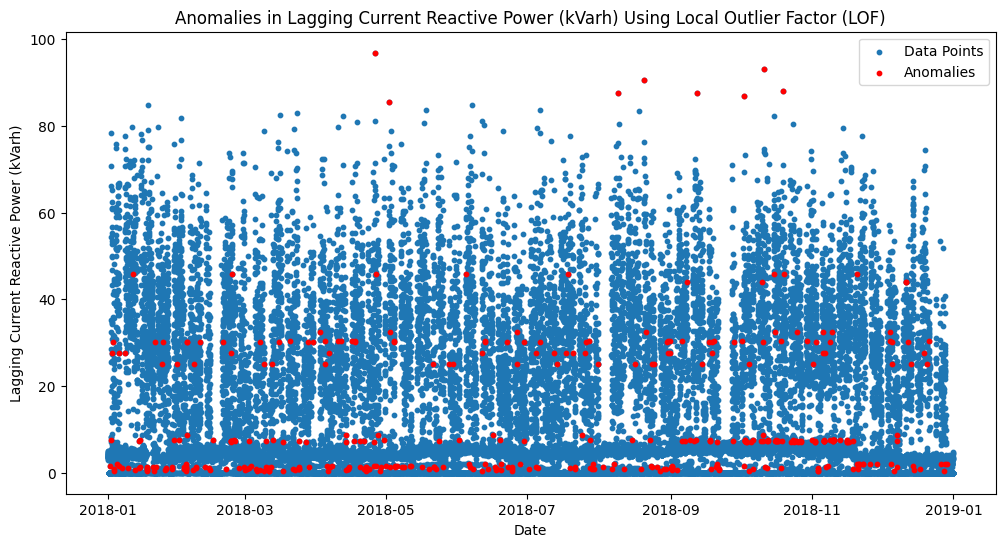

In [39]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
df['anomaly_lof'] = lof.fit_predict(df[['Lagging_Current_Reactive.Power_kVarh']])

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['Lagging_Current_Reactive.Power_kVarh'], label='Data Points', s=10)
plt.scatter(df['date'][df['anomaly_lof'] == -1], df['Lagging_Current_Reactive.Power_kVarh'][df['anomaly_lof'] == -1], color='r', label='Anomalies', s=10)
plt.xlabel('Date')
plt.ylabel('Lagging Current Reactive Power (kVarh)')
plt.title('Anomalies in Lagging Current Reactive Power (kVarh) Using Local Outlier Factor (LOF)')
plt.legend()
plt.show()
